In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [79]:
data=pd.read_excel(r'C:\ANISHA\iris.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Preprocessing

In [80]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [82]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [83]:
data.shape

(150, 5)

In [84]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# Handling Missing Values

In [85]:
for col in['SL', 'SW','PL']:
    data[col]=data[col].fillna(data[col].median())

In [86]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [87]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


In [88]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [89]:
data['Classification'].nunique()

3

# Encoding

In [90]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])

In [91]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


# spliting

In [92]:
y=data['Classification']
x=data.drop(['Classification'],axis=1)

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

# Logistic regression

In [94]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
model=clf.fit(x_train,y_train)


C:\Users\anish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
y_pred=model.predict(x_test)

In [96]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

# Confusion Matrix 

In [97]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [98]:
print('Accuracy =',accuracy_score(y_test,y_pred))
print('Precision =',precision_score(y_test,y_pred,average='macro'))
print('Recall =',recall_score(y_test,y_pred,average='macro'))
print('f1 score =',f1_score(y_test,y_pred,average='macro'))

Accuracy = 0.9777777777777777
Precision = 0.9761904761904763
Recall = 0.9824561403508771
f1 score = 0.9786453119786453


In [99]:
confusion_matrix(y_test,y_pred)

array([[18,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [100]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
22     0
15     0
65     1
11     0
42     0
146    2
51     1
27     0
4      0
32     0
142    2
85     1
86     1
16     0
10     0
Name: Classification, dtype: int32

In [101]:
from sklearn.metrics import classification_report
result=classification_report(y_test,y_pred)
print('Classification Report:\n',result)
result1=accuracy_score(y_test,y_pred)
print('Accuracy:',result1)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


# kNN model

In [102]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)


for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model=classifier.fit(x_train,y_train)
    y_pred_k=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred_k)
    metric_k.append(acc)

C:\Users\anish\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\anish\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [103]:
metric_k

[0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

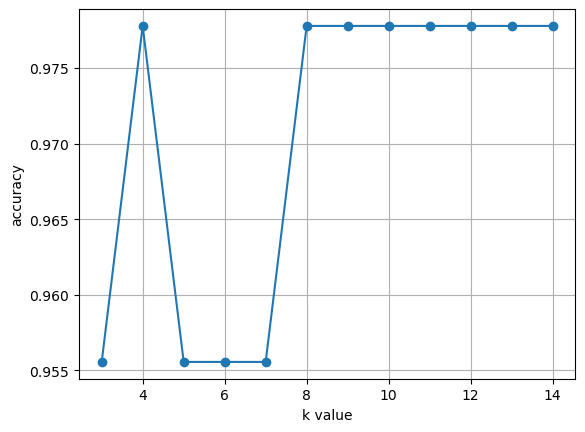

In [104]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [105]:
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2)
model=classifier.fit(x_train,y_train)
y_pred_k=model.predict(x_test)
acc=accuracy_score(y_test,y_pred_k)

C:\Users\anish\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [106]:
print('Accuracy =',accuracy_score(y_test,y_pred_k))
print('Precision =',precision_score(y_test,y_pred_k,average='macro'))
print('Recall =',recall_score(y_test,y_pred_k,average='macro'))
print('f1 score =',f1_score(y_test,y_pred_k,average='macro'))

Accuracy = 0.9777777777777777
Precision = 0.9761904761904763
Recall = 0.9824561403508771
f1 score = 0.9786453119786453


In [107]:
confusion_matrix(y_test,y_pred_k)

array([[18,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [108]:
from sklearn.metrics import classification_report
result=classification_report(y_test,y_pred_k)
print('Classification Report:\n',result)
result1=accuracy_score(y_test,y_pred_k)
print('Accuracy:',result1)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


# Scaling

In [109]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [110]:
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2)
model=classifier.fit(x_train,y_train)
y_pred_k=model.predict(x_test)
acc=accuracy_score(y_test,y_pred_k)

C:\Users\anish\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [136]:
print('Accuracy =',accuracy_score(y_test,y_pred_k))
print('Precision =',precision_score(y_test,y_pred_k,average='macro'))
print('Recall =',recall_score(y_test,y_pred_k,average='macro'))
print('f1 score =',f1_score(y_test,y_pred_k,average='macro'))

Accuracy = 1.0
Precision = 1.0
Recall = 1.0
f1 score = 1.0


In [112]:
confusion_matrix(y_test,y_pred_k)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [113]:
y_pred_k

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [114]:
from sklearn.metrics import classification_report
result=classification_report(y_test,y_pred_k)
print('Classification Report:\n',result)
result1=accuracy_score(y_test,y_pred_k)
print('Accuracy:',result1)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0


# SVM

In [115]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [116]:
y_pred_svm=svmclf.predict(x_test)

In [117]:
print('Accuracy =',accuracy_score(y_test,y_pred_svm))
print('Precision =',precision_score(y_test,y_pred_svm,average='macro'))
print('Recall =',recall_score(y_test,y_pred_svm,average='macro'))
print('f1 score =',f1_score(y_test,y_pred_svm,average='macro'))

Accuracy = 0.9111111111111111
Precision = 0.9215686274509803
Recall = 0.8974358974358975
f1 score = 0.8949494949494948


In [118]:
print(confusion_matrix(y_test,y_pred_svm))

[[19  0  0]
 [ 0  9  4]
 [ 0  0 13]]


In [119]:
from sklearn.metrics import classification_report
result=classification_report(y_test,y_pred_svm)
print('Classification Report:\n',result)
result1=accuracy_score(y_test,y_pred_svm)
print('Accuracy:',result1)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.69      0.82        13
           2       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.93      0.91      0.91        45

Accuracy: 0.9111111111111111


In [120]:
from sklearn.svm import SVC
svmclf=SVC(kernel='rbf')
svmclf.fit(x_train,y_train)

SVC()

In [121]:
print('Accuracy =',accuracy_score(y_test,y_pred_svm))
print('Precision =',precision_score(y_test,y_pred_svm,average='macro'))
print('Recall =',recall_score(y_test,y_pred_svm,average='macro'))
print('f1 score =',f1_score(y_test,y_pred_svm,average='macro'))

Accuracy = 0.9111111111111111
Precision = 0.9215686274509803
Recall = 0.8974358974358975
f1 score = 0.8949494949494948


In [122]:
from sklearn.metrics import classification_report
result=classification_report(y_test,y_pred_rf)
print('Classification Report:\n',result)
result1=accuracy_score(y_test,y_pred_rf)
print('Accuracy:',result1)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


In [123]:
from sklearn.svm import SVC
svmclf=SVC(kernel='poly')
svmclf.fit(x_train,y_train)

SVC(kernel='poly')

In [124]:
print('Accuracy =',accuracy_score(y_test,y_pred_svm))
print('Precision =',precision_score(y_test,y_pred_svm,average='macro'))
print('Recall =',recall_score(y_test,y_pred_svm,average='macro'))
print('f1 score =',f1_score(y_test,y_pred_svm,average='macro'))

Accuracy = 0.9111111111111111
Precision = 0.9215686274509803
Recall = 0.8974358974358975
f1 score = 0.8949494949494948


In [125]:
from sklearn.metrics import classification_report
result=classification_report(y_test,y_pred_svm)
print('Classification Report:\n',result)
result1=accuracy_score(y_test,y_pred_svm)
print('Accuracy:',result1)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.69      0.82        13
           2       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.93      0.91      0.91        45

Accuracy: 0.9111111111111111


# Decision Tree

In [126]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [127]:
y_pred_dt=dt_clf.predict(x_test)

In [128]:
print('Accuracy =',accuracy_score(y_test,y_pred_dt))
print('Precision =',precision_score(y_test,y_pred_dt,average='macro'))
print('Recall =',recall_score(y_test,y_pred_dt,average='macro'))
print('f1 score =',f1_score(y_test,y_pred_dt,average='macro'))

Accuracy = 0.8444444444444444
Precision = 0.8833333333333333
Recall = 0.8205128205128206
f1 score = 0.8064859117490696


In [129]:
print(confusion_matrix(y_test,y_pred_dt))

[[19  0  0]
 [ 0  6  7]
 [ 0  0 13]]


In [130]:
from sklearn.metrics import classification_report
result=classification_report(y_test,y_pred_dt)
print('Classification Report:\n',result)
result1=accuracy_score(y_test,y_pred_dt)
print('Accuracy:',result1)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.46      0.63        13
           2       0.65      1.00      0.79        13

    accuracy                           0.84        45
   macro avg       0.88      0.82      0.81        45
weighted avg       0.90      0.84      0.83        45

Accuracy: 0.8444444444444444


# Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=30)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=30)

In [132]:
y_pred_rf=rf_clf.predict(x_test)

In [133]:
print('Accuracy =',accuracy_score(y_test,y_pred_rf))
print('Precision =',precision_score(y_test,y_pred_rf,average='macro'))
print('Recall =',recall_score(y_test,y_pred_rf,average='macro'))
print('f1 score =',f1_score(y_test,y_pred_rf,average='macro'))

Accuracy = 0.9777777777777777
Precision = 0.9761904761904763
Recall = 0.9743589743589745
f1 score = 0.974320987654321


In [134]:
print(confusion_matrix(y_test,y_pred_rf))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [135]:
from sklearn.metrics import classification_report
result=classification_report(y_test,y_pred_rf)
print('Classification Report:\n',result)
result1=accuracy_score(y_test,y_pred_rf)
print('Accuracy:',result1)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


# comparing accuracy

In [144]:
print('ACCURACY\n')
print('LOGISTIC REGRESSION\t','kNN\t','SVM\t\t\t','DECISION TREE\t\t','RANDOM FOREST\n')
print(accuracy_score(y_test,y_pred),'\t',accuracy_score(y_test,y_pred_k),'\t',accuracy_score(y_test,y_pred_svm),'\t',accuracy_score(y_test,y_pred_dt),'\t',accuracy_score(y_test,y_pred_rf),'\t')

ACCURACY

LOGISTIC REGRESSION	 kNN	 SVM			 DECISION TREE		 RANDOM FOREST

0.9777777777777777 	 1.0 	 0.9111111111111111 	 0.8444444444444444 	 0.9777777777777777 	
